<a href="https://colab.research.google.com/github/rajeshmore1/Self-Project-K-means-clustering-and-Hierarchical-clustering/blob/main/Rajesh_More_Copy_of_M3W4_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







### In your <b>Capstone project</b>, you will perform clustering on documents to find relevant themes/topics. We call this Topic Modeling. There are different algorithms for building a topic model such as Latent Dirichlet Allocation (LDA), NMF etc. For now you are only expected to use the clustering algorithms discussed so far.

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV

In [7]:
dataset = fetch_20newsgroups(download_if_missing=True,remove = ('headers', 'footers', 'quotes'))

In [9]:
print('Training data size:', len(dataset['data']))


Training data size: 11314


In [10]:
len(dataset['target'])


11314

In [11]:
dataset.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
# Finding frequency of each category
targets, frequency = np.unique(dataset.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [13]:
targets_str = np.array(dataset.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


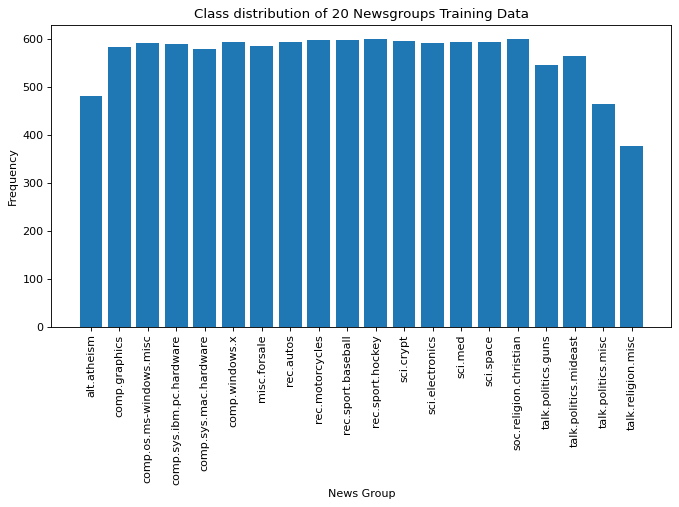

In [14]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [15]:
dataset_df = pd.DataFrame({'data': dataset.data, 'target': dataset.target})
dataset_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [16]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

dataset_df['data'] = dataset_df.data.map(alphanumeric).map(punc_lower)
dataset_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [18]:
dataset_df.data

0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks  my mac plus finally gave up the gh...
3        \ndo you have weitek s address phone number   ...
4        from article      world std com   by tombaker ...
                               ...                        
11309    dn  from  nyeda cnsvax uwec edu  david nye \nd...
11310    i have a  very old  mac   and a mac plus  both...
11311    i just installed a     cpu in a clone motherbo...
11312    \nwouldn t this require a hyper sphere   in   ...
11313    stolen from pasadena between     and     pm on...
Name: data, Length: 11314, dtype: object

# K means Clustering:

In [32]:
texts = dataset.data # Extract text
target = dataset.target # Extract target

In [33]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)


In [34]:
number_of_clusters = 20


model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [36]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])


Cluster 0:
 education
 democratic
 democrat
 republican
 democracy
 money
 congress
 spend
 tennessee
 contend
Cluster 1:
 wycomb
 horsley
 gerhard
 wycliffe
 bothering
 xl
 number
 staying
 bucks
 surprise
Cluster 2:
 sensors
 engine
 ford
 cam
 sensor
 fixes
 damaged
 circut
 denys
 went
Cluster 3:
 like
 just
 know
 don
 people
 think
 does
 thanks
 good
 use
Cluster 4:
 empathetic
 aisun3
 mcovingt
 ditch
 covington
 shy
 uga
 knowledgeable
 jerk
 sounded
Cluster 5:
 camera
 complaint
 puck
 zoomed
 panned
 cameramen
 occassion
 pitt
 rebound
 mom
Cluster 6:
 9591
 18084tm
 mcwilliams
 circumference
 2178
 517
 336
 wk
 355
 grows
Cluster 7:
 30khz
 flop
 lori
 divide
 khz
 flip
 receiving
 square
 signal
 led
Cluster 8:
 atoms
 tcha
 tep
 xenon
 krypton
 electrons
 verifiable
 observable
 noble
 smallest
Cluster 9:
 homosexual
 men
 sexual
 male
 partners
 promiscuous
 dramatically
 gay
 bi
 kolodny
Cluster 10:
 risc
 instruction
 set
 cpus
 reduced
 computer
 orthogonal
 cisc
 uv

In [37]:
print (texts[400])


Isn't Clipper a trademark of Fairchild Semiconductor?


In [38]:
X = vectorizer.transform([texts[400]])

cluster = model.predict(X)[0]

print("Text belongs to cluster number {0}".format(cluster))

Text belongs to cluster number 3


In [39]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])

 like
 just
 know
 don
 people
 think
 does
 thanks
 good
 use


In [55]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
X3= X.reshape(1,-1)

In [69]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


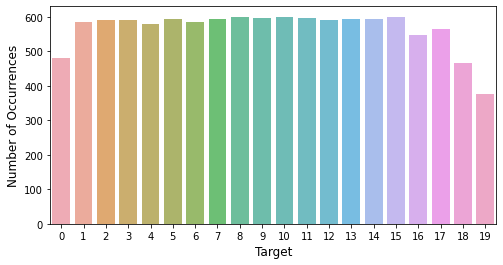

In [70]:
count_target = dataset_df['target'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(count_target.index, count_target.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12);

In [ ]:
plt.figure(figsize=(12,12))
sns.violinplot(x='data', y='target', data=dataset_df)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Number of unique characters in text', fontsize=12)
plt.title("Number of unique characters by target", fontsize=15);

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27 missing from current font.
  font.set_text(s, 0.0, flags=f